# Data Cleaning and EDA

# Imports



In [10]:

import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import sqrt
import numpy as np

# API Requests 

Data obtained from U.S Energy Information Administration 

link- https://www.eia.gov/opendata/qb.php?category=2251670

In [40]:

# url =  "https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-RC-TO-DC.A" 
# response = requests.get(url)

# Texas_industrial = response.json()
# DC_Transport = pd.DataFrame(Texas_industrial['series'][0]['data'])
# DC_Transport.columns = ['Year', 'Industrial_million_metric_tons']
# DC_Transport.head(2)

In [41]:
# url =  "https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-IC-TO-DC.A" 
# response = requests.get(url)

# DC_Residential = response.json()
# DC_Residential = pd.DataFrame(DC_Residential['series'][0]['data'])
# DC_Residential.columns = ['Year', 'Residential_million_metric_tons']
# DC_Residential.head(2)

In [42]:
# url = 'https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-CC-TO-DC.Ahttps://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-CC-TO-DC.A'
# response = requests.get(url)
# DC_Commercial = response.json()
# DC_Commercial = pd.DataFrame(DC_Commercial['series'][0]['data'])
# DC_Commercial.columns = ['Year', 'Commerical_million_metric_tons']
# DC_Commercial.head(2)

In [43]:
# url = 'https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-IC-TO-DC.A'
# response = requests.get(url)
# DC_Transport = response.json()  
# DC_Transport = pd.DataFrame(DC_Transport['series'][0]['data'])
# DC_Transport.columns = ['Year', 'Transport_million_metric_tons']
# DC_Transport.head(2)
# Combined_1 = DC_Commercial.merge(DC_Industrial, on= 'Year')

# sectors = [DC_Industrial, DC_Residential, DC_Transport]

In [44]:
_STATES =  {'Alabama' : 'AL',
'Alaska' : 'AK',
'Arizona' : 'AZ',
'Arkansas' : 'AR',
'California' : 'CA',
'Colorado' : 'CO',
'Connecticut' : 'CT',
'Delaware' : 'DE',
'Florida' : 'FL',
'Georgia' : 'GA',
'Hawaii' : 'HI',
'Idaho' : 'ID',
'Illinois' : 'IL',
'Indiana' : 'IN',
'Iowa' : 'IA',
'Kansas' : 'KS',
'Kentucky' : 'KY',
'Louisiana' : 'LA',
'Maine' : 'ME',
'Maryland' : 'MD',
'Massachusetts' : 'MA',
'Michigan' : 'MI',
'Minnesota' : 'MN',
'Mississippi' : 'MS',
'Missouri' : 'MO',
'Montana' : 'MT',
'Nebraska' : 'NE',
'Nevada' : 'NV',
'New Hampshire' : 'NH',
'New Jersey' : 'NJ',
'New Mexico' : 'NM',
'New York' : 'NY',
'North Carolina' : 'NC',
'North Dakota' : 'ND',
'Ohio' : 'OH',
'Oklahoma' : 'OK',
'Oregon' : 'OR',
'Pennsylvania' : 'PA',
'Rhode Island' : 'RI',
'South Carolina' : 'SC',
'South Dakota' : 'SD',
'Tennessee' : 'TN',
'Texas' : 'TX',
'Utah' : 'UT',
'Vermont' : 'VT',
'Virginia' : 'VA',
'Washington' : 'WA',
'West Virginia' : 'WV',
'Wisconsin' : 'WI',
'Wyoming' : 'WY'
}

In [45]:
_STATES.values()

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

In [46]:
url =  "https://api.eia.gov/series" 

PARMS = {'api_key':'106ca842268ae4f59b5872302c603bf2',
         'series_id': 'EMISS.CO2-TOTV-TT-TO-DC.A' 
        }

data = []


#Initialize an empty dataframe to begin
df = pd.DataFrame()

# Call the api multiple times for each state
for state in _STATES.values():
    
    # Reconstruct the series_id string to reflect the state
    PARMS['series_id'] = PARMS['series_id'][:21] + state + '.A'  
    response = requests.get(url, params=PARMS)
    data.append(response)
    

# Iterate through all the responses saved in the list called 'data'
for tmp in data:
    
    #Save the dataframe to a temporary spot called '_'
    _ = pd.DataFrame(tmp.json()['series'][0]['data'], columns = ['Year', 'Carbon_Emissions'])
                     
    # Create a third column called 'State' and set the defualt value to the name of the state                 
    _['State'] = tmp.json()['series'][0]['name'].split(', ')[2]
                     
    #update our main dataframe with additional rows
    df = pd.concat([df, _]) 
df.head(2)

,Year,Carbon_Emissions,State
0,2017,109.018634,Alabama
1,2016,114.872696,Alabama


In [47]:
grouped = df.groupby('State')
grouped = pd.DataFrame(grouped.sum())
grouped.reset_index(inplace=True)

grouped.sort_values(by='Carbon_Emissions', ascending=False, inplace=True)
grouped.head(2)

,State,Carbon_Emissions
42,Texas,24307.492673
4,California,13376.910904


In [48]:
grouped['Region'] = None

              
North_East = [ 'New Jersey', 'New York','Connecticut', 'Rhode Island', 'Massachusetts',
              'New Hampshire', 'Maine', 'Vermont', 'Pennsylvania']


Mid_West  = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
            'Missouri', 'Iowa','Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio' ]


West = ['California', 'Alaska', 'Washington', 'Oregon', 'Nevada', 
                  'Idaho', 'Utah', 'Montana', 'Wyoming', 'Colorado', 
                  'Hawaii', 'New Mexico', 'Arizona']

South = ['Texas', 'oklahoma', 'North Carolina','Arkansas', 'Alabama', 'Delaware',
        'Virginia', 'Florida', 'West Virginia', 'South Carolina', 'Louisiana', 'Georgia', 'Louisiana', 
         'Mississippi', 'Tennessee','Kentucky', 'Maryland' ]


# link to NGO https://www.nationalgeographic.org/maps/united-states-regions/

In [49]:
def region_maker(state):
    if state in West:
        return 'West'
    if state in South:
        return 'South'
    if state in Mid_West:
        return 'Mid_West'
    if state in North_East:
        return 'North_East'
    
    
grouped['Region'] = grouped.State.apply(region_maker)
grouped.Carbon_Emissions.describe()
grouped.head()

,State,Carbon_Emissions,Region
42,Texas,24307.492673,South
4,California,13376.910904,West
37,Pennsylvania,9826.556726,North_East
34,Ohio,9418.204369,Mid_West
17,Louisiana,8258.988395,South


Text(0.5, 1.0, "US Region's Carbon Emissions")

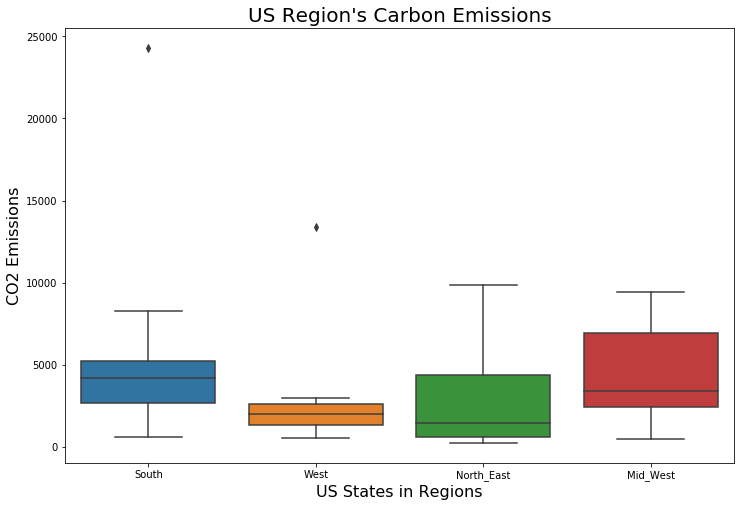

In [50]:
X=grouped.Region
Y = grouped.Carbon_Emissions
grouped.sort_values('Region')
plt.figure(figsize=(12, 8))
sns.boxplot(X, Y)
plt.xlabel('US States in Regions', fontsize=16)
plt.ylabel('CO2 Emissions', fontsize=16)
plt.title("US Region's Carbon Emissions", fontsize=20)



In [51]:
#SAMPLE STATISTICS

East = grouped.loc[grouped['Region'] == 'South']
East.Carbon_Emissions.describe()


count       15.000000
mean      5512.524600
std       5597.021462
min        587.754142
25%       2642.098480
50%       4159.759473
75%       5249.662395
max      24307.492673
Name: Carbon_Emissions, dtype: float64

In [52]:
#Z SCORE

x_bar =  5512.524600 # sample mean 
n =  15 # number of students
sigma = 4105.22 # sd of population
mu = 4028.28 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))

z 


1.4002793071987096

In [53]:
#z VALUE

stats.norm.cdf(z)

0.9192851525493166

In [54]:
# P value

pval = 1 - stats.norm.cdf(z)
pval

0.08071484745068336

# One sample Z test 

Null hypothesis = CO2 emissions from the West coast region is the same as the state 

Hypothesis = There is a differnce between the state and the West Coast

In [55]:
by_region = grouped.groupby(grouped.Region)
by_region = (by_region.sum())
by_region.reset_index(inplace=True)

by_region

,Region,Carbon_Emissions
0,Mid_West,52578.690083
1,North_East,27870.109303
2,South,82687.868993
3,West,34654.963282


In [56]:
X = by_region.Region
Y = by_region.Carbon_Emissions



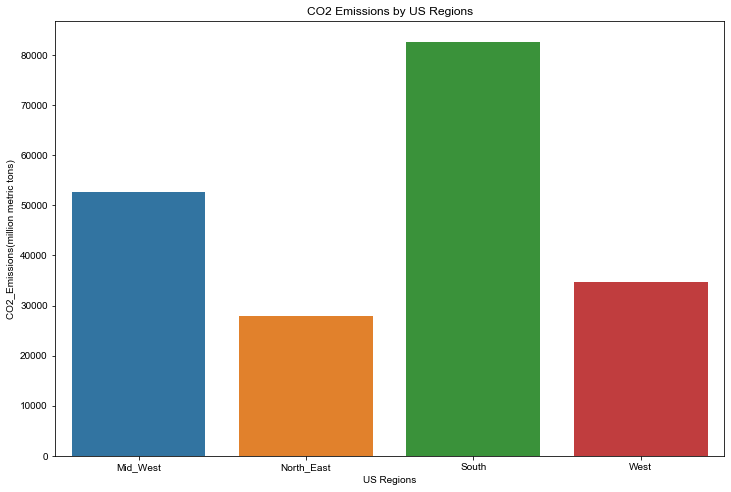

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(X, Y)
plt.ylabel('CO2_Emissions(million metric tons)')
plt.xlabel('US Regions')
plt.title('CO2 Emissions by US Regions')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=0)
plt.show()


# Population Data obtained from the US Census Bureau

link = https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/

In [58]:
pop = pd.read_csv('/Users/lidetalemu/Documents/SCPRC-EST2019-18+POP-RES.csv')
pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [59]:
popn = pop.drop(0)

popn.head(2)

popn.sort_values(by='POPESTIMATE2019', ascending=False, inplace=True)
popn.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
5,40,4,9,6,California,39512223,30617582,77.5
44,40,3,7,48,Texas,28995881,21596071,74.5
10,40,3,5,12,Florida,21477737,17247808,80.3
33,40,1,2,36,New York,19453561,15425262,79.3
39,40,1,2,42,Pennsylvania,12801989,10167376,79.4


In [30]:
# x_bar = 103 # sample mean 
# n = 40 # number of students
# sigma = 16 # sd of population
# mu = 100 # Population mean 

# z = (x_bar - mu)/(sigma/sqrt(n))
# z

In [31]:
# stats.norm.cdf(z)

In [32]:
# pval = 1 - stats.norm.cdf(z)
# pval

In [61]:
population_df = pd.read_excel('/Users/lidetalemu/Downloads/nst-est2019-01.xlsx')


In [62]:
population_df.columns = population_df.iloc[2]

population_df.rename(columns = {np.nan: 'States',         
                                'Census': 'Census', 
                                'Estimates Base': 'Estimates Base',             
                                2010 : 2010,
                                2011.0 : 2011,
                                2012.0 : 2012,
                                2013.0 : 2013,
                                2014.0 : 2014,
                                2015.0 : 2015,           
                                2016.0 : 2016,           
                                2017.0 : 2017,           
                                2018.0 : 2018,
                                2019.0 : 2019 
                               }, 
                     inplace=True)

population_df.drop(range(3), inplace=True)

population_df.drop(list(range(59, 66)), inplace=True)

population_df['States'] = population_df['States'].map(lambda x: x.replace('.', ''))

population_df = population_df.T

population_df.columns = population_df.iloc[0]

population_df.reset_index(inplace = True)

population_df.rename(columns = {2: 'Year'}, inplace =True)

population_df.drop(range(3), inplace = True)

population_df.reset_index(inplace = True)

population_df.drop(columns=['index'], inplace=True)

population_df.index.name = None

population_df.columns = population_df.columns.get_level_values(0)



In [63]:
population_df.head()

States,Year,United States,Northeast,Midwest,South,West,Alabama,Alaska,Arizona,Arkansas,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2010,309321666,55380134,66974416,114866680,72100436,4785437,713910,6407172,2921964,...,816166,6355311,25241971,2775332,625879,8023699,6742830,1854239,5690475,564487
1,2011,3.11557e+08,5.56042e+07,6.71578e+07,1.16007e+08,7.27883e+07,4.79907e+06,722128,6.47264e+06,2.94067e+06,...,823579,6.39929e+06,2.56456e+07,2.81438e+06,627049,8.10116e+06,6.82663e+06,1.8563e+06,5.70529e+06,567299
2,2012,3.13831e+08,5.57752e+07,6.73367e+07,1.17241e+08,7.34778e+07,4.81559e+06,730443,6.55498e+06,2.95216e+06,...,833566,6.4539e+06,2.60845e+07,2.85338e+06,626090,8.18508e+06,6.89706e+06,1.85687e+06,5.71996e+06,576305
3,2013,3.15994e+08,5.59018e+07,6.75604e+07,1.18364e+08,7.41671e+07,4.83008e+06,737068,6.63276e+06,2.9594e+06,...,842316,6.49434e+06,2.64803e+07,2.89764e+06,626210,8.25243e+06,6.96398e+06,1.85391e+06,5.73675e+06,582122
4,2014,3.18301e+08,5.6006e+07,6.77452e+07,1.19624e+08,7.49258e+07,4.8418e+06,736283,6.73041e+06,2.96739e+06,...,849129,6.54122e+06,2.69643e+07,2.93688e+06,625214,8.31099e+06,7.05466e+06,1.84949e+06,5.75152e+06,582531


In [64]:
population_2017 = population_df.loc[population_df['Year']== 2017]
population_2017= population_2017.T
population_2017.reset_index(inplace=True)
population_2017.columns = ['States', 'Population_Data']
population_2017.drop(0, inplace=True)

Popn_Regions = population_2017.iloc[:5]
Popn_Regions.drop(1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
Popn_Regions

,States,Population_Data
2,Northeast,5.60592e+07
3,Midwest,6.81268e+07
4,South,1.23542e+08
5,West,7.72573e+07


In [71]:
x= Popn_Regions.States
y= Popn_Regions.Population_Data

In [72]:
#First, you divide 38 by 230, then multiply that total by 100.

total_pop = sum(Popn_Regions.Population_Data)
Popn_Regions.Population_Data = Popn_Regions['Population_Data'].apply(lambda x: x/total_pop)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
Popn_Regions.Population_Data = Popn_Regions.Population_Data.round(2)
Popn_Regions

,States,Population_Data
2,Northeast,0.17
3,Midwest,0.21
4,South,0.38
5,West,0.24


In [74]:
total_emissions

NameError: name 'total_emissions' is not defined

In [75]:
total_emissions = sum(by_region.Carbon_Emissions)
by_region.Carbon_Emissions = by_region.Carbon_Emissions.apply(lambda x:x/total_emissions)
by_region.Carbon_Emissions = by_region.Carbon_Emissions.round(2)
by_region

,Region,Carbon_Emissions
0,Mid_West,0.27
1,North_East,0.14
2,South,0.42
3,West,0.18


In [76]:
o = [0.27, 0.14, 0.42, 0.18]
e = [0.17, 0.21, 0.38, 0.24]



In [77]:
chi = (o[0]-e[0])**2/e[0] + (o[1]-e[1])**2/e[1] + (o[2]-e[2])**2/e[2]
chi

0.0863673890608875

In [78]:
#pval = 1 - stats.norm.ppf(chi)
#pval